# **Preparacion de lo datos**

In [662]:
import pandas as pd
import plotly.express as px

In [663]:
datos = pd.read_csv('/content/datos_tratados.csv')

In [664]:
datos

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,gasto_diario
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,False,Female,False,False,False,13,True,No,DSL,...,No,Yes,No,No,One year,False,Mailed check,55.15,742.90,1.838333
7252,9992-RRAMN,True,Male,False,True,False,22,True,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,True,Electronic check,85.10,1873.70,2.836667
7253,9992-UJOEL,False,Male,False,False,False,2,True,No,DSL,...,No,No,No,No,Month-to-month,True,Mailed check,50.30,92.75,1.676667
7254,9993-LHIEB,False,Male,False,True,True,67,True,No,DSL,...,Yes,Yes,No,Yes,Two year,False,Mailed check,67.85,4627.65,2.261667


In [665]:
datos = datos.drop(['customerID','gasto_diario',], axis=1)

In [666]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7256 non-null   bool   
 1   customer.gender            7256 non-null   object 
 2   customer.SeniorCitizen     7256 non-null   bool   
 3   customer.Partner           7256 non-null   bool   
 4   customer.Dependents        7256 non-null   bool   
 5   customer.tenure            7256 non-null   int64  
 6   phone.PhoneService         7256 non-null   bool   
 7   phone.MultipleLines        7256 non-null   object 
 8   internet.InternetService   7256 non-null   object 
 9   internet.OnlineSecurity    7256 non-null   object 
 10  internet.OnlineBackup      7256 non-null   object 
 11  internet.DeviceProtection  7256 non-null   object 
 12  internet.TechSupport       7256 non-null   object 
 13  internet.StreamingTV       7256 non-null   objec

In [667]:
X= datos.drop('Churn', axis= 1)
y = datos['Churn']

In [668]:
X.columns

Index(['customer.gender', 'customer.SeniorCitizen', 'customer.Partner',
       'customer.Dependents', 'customer.tenure', 'phone.PhoneService',
       'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [669]:
X.head(2)

,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,Female,False,True,True,9,True,No,DSL,No,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.3
1,Male,False,False,False,9,True,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.4


## **Encoding**

In [670]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [671]:
columnas = X.columns

In [672]:
one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                  ['customer.gender','customer.SeniorCitizen','customer.Partner','customer.Dependents','phone.PhoneService','phone.MultipleLines','internet.InternetService','internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV','internet.StreamingMovies','account.Contract','account.PaperlessBilling','account.PaymentMethod']),
                                  remainder='passthrough',
                                  sparse_threshold=0,
                                  force_int_remainder_cols=False)

In [673]:
X = one_hot.fit_transform(X)

In [674]:
one_hot.get_feature_names_out(columnas)

array(['onehotencoder__customer.gender_Male',
       'onehotencoder__customer.SeniorCitizen_True',
       'onehotencoder__customer.Partner_True',
       'onehotencoder__customer.Dependents_True',
       'onehotencoder__phone.PhoneService_True',
       'onehotencoder__phone.MultipleLines_No',
       'onehotencoder__phone.MultipleLines_No phone service',
       'onehotencoder__phone.MultipleLines_Yes',
       'onehotencoder__internet.InternetService_DSL',
       'onehotencoder__internet.InternetService_Fiber optic',
       'onehotencoder__internet.InternetService_No',
       'onehotencoder__internet.OnlineSecurity_Yes',
       'onehotencoder__internet.OnlineBackup_No',
       'onehotencoder__internet.OnlineBackup_No internet service',
       'onehotencoder__internet.OnlineBackup_Yes',
       'onehotencoder__internet.DeviceProtection_No',
       'onehotencoder__internet.DeviceProtection_No internet service',
       'onehotencoder__internet.DeviceProtection_Yes',
       'onehotencoder__int

In [675]:
X_codificado=pd.DataFrame(X, columns=one_hot.get_feature_names_out(columnas))

In [676]:
type(X)

numpy.ndarray

In [677]:
X_codificado.columns

Index(['onehotencoder__customer.gender_Male',
       'onehotencoder__customer.SeniorCitizen_True',
       'onehotencoder__customer.Partner_True',
       'onehotencoder__customer.Dependents_True',
       'onehotencoder__phone.PhoneService_True',
       'onehotencoder__phone.MultipleLines_No',
       'onehotencoder__phone.MultipleLines_No phone service',
       'onehotencoder__phone.MultipleLines_Yes',
       'onehotencoder__internet.InternetService_DSL',
       'onehotencoder__internet.InternetService_Fiber optic',
       'onehotencoder__internet.InternetService_No',
       'onehotencoder__internet.OnlineSecurity_Yes',
       'onehotencoder__internet.OnlineBackup_No',
       'onehotencoder__internet.OnlineBackup_No internet service',
       'onehotencoder__internet.OnlineBackup_Yes',
       'onehotencoder__internet.DeviceProtection_No',
       'onehotencoder__internet.DeviceProtection_No internet service',
       'onehotencoder__internet.DeviceProtection_Yes',
       'onehotencoder__int

In [678]:
X_codificado[['onehotencoder__customer.gender_Male','onehotencoder__customer.SeniorCitizen_True','onehotencoder__customer.Partner_True','onehotencoder__customer.Dependents_True']].corr()

,onehotencoder__customer.gender_Male,onehotencoder__customer.SeniorCitizen_True,onehotencoder__customer.Partner_True,onehotencoder__customer.Dependents_True
onehotencoder__customer.gender_Male,1.000000,-0.004239,-0.004593,0.011884
onehotencoder__customer.SeniorCitizen_True,-0.004239,1.000000,0.023439,-0.212338
onehotencoder__customer.Partner_True,-0.004593,0.023439,1.000000,0.448500
onehotencoder__customer.Dependents_True,0.011884,-0.212338,0.448500,1.000000


In [679]:
X_codificado[['onehotencoder__phone.PhoneService_True',
       'onehotencoder__phone.MultipleLines_No',
       'onehotencoder__phone.MultipleLines_No phone service',
       'onehotencoder__phone.MultipleLines_Yes']].corr()

,onehotencoder__phone.PhoneService_True,onehotencoder__phone.MultipleLines_No,onehotencoder__phone.MultipleLines_No phone service,onehotencoder__phone.MultipleLines_Yes
onehotencoder__phone.PhoneService_True,1.000000,0.315801,-1.000000,0.280225
onehotencoder__phone.MultipleLines_No,0.315801,1.000000,-0.315801,-0.822315
onehotencoder__phone.MultipleLines_No phone service,-1.000000,-0.315801,1.000000,-0.280225
onehotencoder__phone.MultipleLines_Yes,0.280225,-0.822315,-0.280225,1.000000


In [680]:
X_codificado=X_codificado.drop(['onehotencoder__phone.MultipleLines_No',
       'onehotencoder__phone.MultipleLines_No phone service'], axis=1)

In [681]:
X_codificado[['onehotencoder__internet.InternetService_DSL',
       'onehotencoder__internet.InternetService_Fiber optic',
       'onehotencoder__internet.InternetService_No',
       'onehotencoder__internet.OnlineSecurity_Yes',
       'onehotencoder__internet.OnlineBackup_No',
       'onehotencoder__internet.OnlineBackup_No internet service',
       'onehotencoder__internet.OnlineBackup_Yes',
       'onehotencoder__internet.DeviceProtection_No',
       'onehotencoder__internet.DeviceProtection_No internet service',
       'onehotencoder__internet.DeviceProtection_Yes',
       'onehotencoder__internet.TechSupport_No',
       'onehotencoder__internet.TechSupport_No internet service',
       'onehotencoder__internet.TechSupport_Yes',
       'onehotencoder__internet.StreamingTV_No',
       'onehotencoder__internet.StreamingTV_No internet service',
       'onehotencoder__internet.StreamingTV_Yes',
       'onehotencoder__internet.StreamingMovies_No',
       'onehotencoder__internet.StreamingMovies_No internet service',
       'onehotencoder__internet.StreamingMovies_Yes',]].corr()

,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,onehotencoder__internet.OnlineSecurity_Yes,onehotencoder__internet.OnlineBackup_No,onehotencoder__internet.OnlineBackup_No internet service,onehotencoder__internet.OnlineBackup_Yes,onehotencoder__internet.DeviceProtection_No,onehotencoder__internet.DeviceProtection_No internet service,onehotencoder__internet.DeviceProtection_Yes,onehotencoder__internet.TechSupport_No,onehotencoder__internet.TechSupport_No internet service,onehotencoder__internet.TechSupport_Yes,onehotencoder__internet.StreamingTV_No,onehotencoder__internet.StreamingTV_No internet service,onehotencoder__internet.StreamingTV_Yes,onehotencoder__internet.StreamingMovies_No,onehotencoder__internet.StreamingMovies_No internet service,onehotencoder__internet.StreamingMovies_Yes
onehotencoder__internet.InternetService_DSL,1.000000,-0.640289,-0.379770,0.318427,0.164774,-0.379770,0.157399,0.177898,-0.379770,0.143793,0.031132,-0.379770,0.310906,0.303912,-0.379770,0.015906,0.296665,-0.379770,0.023671
onehotencoder__internet.InternetService_Fiber optic,-0.640289,1.000000,-0.467424,-0.027704,0.228818,-0.467424,0.166567,0.217684,-0.467424,0.178313,0.401827,-0.467424,-0.018089,0.065792,-0.467424,0.329961,0.069756,-0.467424,0.325464
onehotencoder__internet.InternetService_No,-0.379770,-0.467424,1.000000,-0.333107,-0.465207,1.000000,-0.381748,-0.466902,1.000000,-0.380235,-0.519758,1.000000,-0.336032,-0.429002,1.000000,-0.415685,-0.425435,1.000000,-0.419205
onehotencoder__internet.OnlineSecurity_Yes,0.318427,-0.027704,-0.333107,1.000000,0.002931,-0.333107,0.285905,0.013550,-0.333107,0.275152,-0.047934,-0.333107,0.355656,0.104970,-0.333107,0.176661,0.091604,-0.333107,0.189913
onehotencoder__internet.OnlineBackup_No,0.164774,0.228818,-0.465207,0.002931,1.000000,-0.465207,-0.640571,0.364674,-0.465207,0.022653,0.383941,-0.465207,-0.000387,0.317542,-0.465207,0.074602,0.309403,-0.465207,0.083171
onehotencoder__internet.OnlineBackup_No internet service,-0.379770,-0.467424,1.000000,-0.333107,-0.465207,1.000000,-0.381748,-0.466902,1.000000,-0.380235,-0.519758,1.000000,-0.336032,-0.429002,1.000000,-0.415685,-0.425435,1.000000,-0.419205
onehotencoder__internet.OnlineBackup_Yes,0.157399,0.166567,-0.381748,0.285905,-0.640571,-0.381748,1.000000,0.024263,-0.381748,0.306196,0.049998,-0.381748,0.291907,0.040597,-0.381748,0.282707,0.046001,-0.381748,0.276812
onehotencoder__internet.DeviceProtection_No,0.177898,0.217684,-0.466902,0.013550,0.364674,-0.466902,0.024263,1.000000,-0.466902,-0.640356,0.419635,-0.466902,-0.038197,0.423882,-0.466902,-0.031032,0.430726,-0.466902,-0.037106
onehotencoder__internet.DeviceProtection_No internet service,-0.379770,-0.467424,1.000000,-0.333107,-0.465207,1.000000,-0.381748,-0.466902,1.000000,-0.380235,-0.519758,1.000000,-0.336032,-0.429002,1.000000,-0.415685,-0.425435,1.000000,-0.419205
onehotencoder__internet.DeviceProtection_Yes,0.143793,0.178313,-0.380235,0.275152,0.022653,-0.380235,0.306196,-0.640356,-0.380235,1.000000,0.012550,-0.380235,0.331815,-0.070719,-0.380235,0.393505,-0.080974,-0.380235,0.402915


In [682]:
X_codificado=X_codificado.drop(['onehotencoder__internet.OnlineBackup_No',
                                'onehotencoder__internet.OnlineBackup_No internet service',
                                'onehotencoder__internet.DeviceProtection_No',
                                'onehotencoder__internet.DeviceProtection_No internet service',
                                'onehotencoder__internet.TechSupport_No',
                                'onehotencoder__internet.TechSupport_No internet service',
                                'onehotencoder__internet.StreamingTV_No',
                                'onehotencoder__internet.StreamingTV_No internet service',
                                'onehotencoder__internet.StreamingMovies_No',
                                'onehotencoder__internet.StreamingMovies_No internet service',
                                'onehotencoder__internet.OnlineSecurity_Yes'], axis=1)

In [683]:
X_codificado.columns

Index(['onehotencoder__customer.gender_Male',
       'onehotencoder__customer.SeniorCitizen_True',
       'onehotencoder__customer.Partner_True',
       'onehotencoder__customer.Dependents_True',
       'onehotencoder__phone.PhoneService_True',
       'onehotencoder__phone.MultipleLines_Yes',
       'onehotencoder__internet.InternetService_DSL',
       'onehotencoder__internet.InternetService_Fiber optic',
       'onehotencoder__internet.InternetService_No',
       'onehotencoder__internet.OnlineBackup_Yes',
       'onehotencoder__internet.DeviceProtection_Yes',
       'onehotencoder__internet.TechSupport_Yes',
       'onehotencoder__internet.StreamingTV_Yes',
       'onehotencoder__internet.StreamingMovies_Yes',
       'onehotencoder__account.Contract_Month-to-month',
       'onehotencoder__account.Contract_One year',
       'onehotencoder__account.Contract_Two year',
       'onehotencoder__account.PaperlessBilling_True',
       'onehotencoder__account.PaymentMethod_Bank transfer (aut

In [684]:
X_codificado[['onehotencoder__internet.InternetService_DSL',
       'onehotencoder__internet.InternetService_Fiber optic',
       'onehotencoder__internet.InternetService_No',
       'onehotencoder__internet.OnlineBackup_Yes',
       'onehotencoder__internet.DeviceProtection_Yes',
       'onehotencoder__internet.TechSupport_Yes',
       'onehotencoder__internet.StreamingTV_Yes',
       'onehotencoder__internet.StreamingMovies_Yes']].corr()

,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,onehotencoder__internet.OnlineBackup_Yes,onehotencoder__internet.DeviceProtection_Yes,onehotencoder__internet.TechSupport_Yes,onehotencoder__internet.StreamingTV_Yes,onehotencoder__internet.StreamingMovies_Yes
onehotencoder__internet.InternetService_DSL,1.000000,-0.640289,-0.379770,0.157399,0.143793,0.310906,0.015906,0.023671
onehotencoder__internet.InternetService_Fiber optic,-0.640289,1.000000,-0.467424,0.166567,0.178313,-0.018089,0.329961,0.325464
onehotencoder__internet.InternetService_No,-0.379770,-0.467424,1.000000,-0.381748,-0.380235,-0.336032,-0.415685,-0.419205
onehotencoder__internet.OnlineBackup_Yes,0.157399,0.166567,-0.381748,1.000000,0.306196,0.291907,0.282707,0.276812
onehotencoder__internet.DeviceProtection_Yes,0.143793,0.178313,-0.380235,0.306196,1.000000,0.331815,0.393505,0.402915
onehotencoder__internet.TechSupport_Yes,0.310906,-0.018089,-0.336032,0.291907,0.331815,1.000000,0.277870,0.280833
onehotencoder__internet.StreamingTV_Yes,0.015906,0.329961,-0.415685,0.282707,0.393505,0.277870,1.000000,0.531612
onehotencoder__internet.StreamingMovies_Yes,0.023671,0.325464,-0.419205,0.276812,0.402915,0.280833,0.531612,1.000000


In [685]:
X_codificado[['onehotencoder__account.Contract_Month-to-month',
       'onehotencoder__account.Contract_One year',
       'onehotencoder__account.Contract_Two year',
       'onehotencoder__account.PaperlessBilling_True',]].corr()

,onehotencoder__account.Contract_Month-to-month,onehotencoder__account.Contract_One year,onehotencoder__account.Contract_Two year,onehotencoder__account.PaperlessBilling_True
onehotencoder__account.Contract_Month-to-month,1.000000,-0.570885,-0.621734,0.167119
onehotencoder__account.Contract_One year,-0.570885,1.000000,-0.288116,-0.051231
onehotencoder__account.Contract_Two year,-0.621734,-0.288116,1.000000,-0.146044
onehotencoder__account.PaperlessBilling_True,0.167119,-0.051231,-0.146044,1.000000


In [686]:
X_codificado[['onehotencoder__account.PaymentMethod_Bank transfer (automatic)',
       'onehotencoder__account.PaymentMethod_Credit card (automatic)',
       'onehotencoder__account.PaymentMethod_Electronic check',
       'onehotencoder__account.PaymentMethod_Mailed check',]].corr()

,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check
onehotencoder__account.PaymentMethod_Bank transfer (automatic),1.000000,-0.277685,-0.377187,-0.287833
onehotencoder__account.PaymentMethod_Credit card (automatic),-0.277685,1.000000,-0.374144,-0.285511
onehotencoder__account.PaymentMethod_Electronic check,-0.377187,-0.374144,1.000000,-0.387818
onehotencoder__account.PaymentMethod_Mailed check,-0.287833,-0.285511,-0.387818,1.000000


In [687]:
X_codificado[['remainder__account.Charges.Monthly',
       'remainder__account.Charges.Total']].corr()

,remainder__account.Charges.Monthly,remainder__account.Charges.Total
remainder__account.Charges.Monthly,1.000000,0.652109
remainder__account.Charges.Total,0.652109,1.000000


In [688]:
y.value_counts()

,count
Churn,
False,5163
True,2093


In [689]:
y= y.replace({True:1, False:0})

/tmp/ipython-input-2159378558.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [690]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7256 entries, 0 to 7255
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7256 non-null   int64
dtypes: int64(1)
memory usage: 56.8 KB


In [691]:
X_codificado.corrwith(y)

,0
onehotencoder__customer.gender_Male,-0.005066
onehotencoder__customer.SeniorCitizen_True,0.144205
onehotencoder__customer.Partner_True,-0.138289
onehotencoder__customer.Dependents_True,-0.152112
onehotencoder__phone.PhoneService_True,0.008584
onehotencoder__phone.MultipleLines_Yes,0.037606
onehotencoder__internet.InternetService_DSL,-0.121967
onehotencoder__internet.InternetService_Fiber optic,0.291985
onehotencoder__internet.InternetService_No,-0.211274
onehotencoder__internet.OnlineBackup_Yes,-0.078818


In [692]:
X_codificado

,onehotencoder__customer.gender_Male,onehotencoder__customer.SeniorCitizen_True,onehotencoder__customer.Partner_True,onehotencoder__customer.Dependents_True,onehotencoder__phone.PhoneService_True,onehotencoder__phone.MultipleLines_Yes,onehotencoder__internet.InternetService_DSL,onehotencoder__internet.InternetService_Fiber optic,onehotencoder__internet.InternetService_No,onehotencoder__internet.OnlineBackup_Yes,...,onehotencoder__account.Contract_One year,onehotencoder__account.Contract_Two year,onehotencoder__account.PaperlessBilling_True,onehotencoder__account.PaymentMethod_Bank transfer (automatic),onehotencoder__account.PaymentMethod_Credit card (automatic),onehotencoder__account.PaymentMethod_Electronic check,onehotencoder__account.PaymentMethod_Mailed check,remainder__customer.tenure,remainder__account.Charges.Monthly,remainder__account.Charges.Total
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,65.60,593.30
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,59.90,542.40
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,4.0,73.90,280.85
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,13.0,98.00,1237.85
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,55.15,742.90
7252,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,22.0,85.10,1873.70
7253,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,50.30,92.75
7254,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,67.0,67.85,4627.65


In [693]:
X_codificado.columns

Index(['onehotencoder__customer.gender_Male',
       'onehotencoder__customer.SeniorCitizen_True',
       'onehotencoder__customer.Partner_True',
       'onehotencoder__customer.Dependents_True',
       'onehotencoder__phone.PhoneService_True',
       'onehotencoder__phone.MultipleLines_Yes',
       'onehotencoder__internet.InternetService_DSL',
       'onehotencoder__internet.InternetService_Fiber optic',
       'onehotencoder__internet.InternetService_No',
       'onehotencoder__internet.OnlineBackup_Yes',
       'onehotencoder__internet.DeviceProtection_Yes',
       'onehotencoder__internet.TechSupport_Yes',
       'onehotencoder__internet.StreamingTV_Yes',
       'onehotencoder__internet.StreamingMovies_Yes',
       'onehotencoder__account.Contract_Month-to-month',
       'onehotencoder__account.Contract_One year',
       'onehotencoder__account.Contract_Two year',
       'onehotencoder__account.PaperlessBilling_True',
       'onehotencoder__account.PaymentMethod_Bank transfer (aut

In [694]:
X_codificado=X_codificado.rename(columns={
    'onehotencoder__customer.gender_Male': 'Male',
    'onehotencoder__customer.SeniorCitizen_True': 'SeniorCitizen',
    'onehotencoder__customer.Partner_True' : 'Partner',
    'onehotencoder__customer.Dependents_True':'Dependents',
    'onehotencoder__phone.PhoneService_True': 'PhoneService',
    'onehotencoder__phone.MultipleLines_Yes':'PhoneServiceMultipleLines',
    'onehotencoder__internet.InternetService_DSL': 'InternetServiceDSL',
    'onehotencoder__internet.InternetService_Fiber optic': 'InternetServiceFiberOptic',
    'onehotencoder__internet.InternetService_No':'NoInternetService',
    'onehotencoder__internet.OnlineBackup_Yes':'OnlineBackup',
    'onehotencoder__internet.DeviceProtection_Yes' :'DeviceProtection',
    'onehotencoder__internet.TechSupport_Yes' : 'TechSupport',
    'onehotencoder__internet.StreamingTV_Yes' : 'StreamingTV',
    'onehotencoder__account.Contract_Month-to-month':'ContractMonth',
    'onehotencoder__account.Contract_One year' : 'ContractOneYear',
    'onehotencoder__account.Contract_Two year' :'ContractTwoYears',
    'onehotencoder__account.PaperlessBilling_True': 'PaperlessBilling',
    'onehotencoder__account.PaymentMethod_Bank transfer (automatic)':'BankTransfer',
    'onehotencoder__account.PaymentMethod_Credit card (automatic)':'CreditCard',
    'onehotencoder__account.PaymentMethod_Electronic check':'Electronic_check',
    'onehotencoder__account.PaymentMethod_Mailed check':'MailedCheck',
    'remainder__customer.tenure':'ternure',
    'remainder__account.Charges.Monthly':'ChargesMonthly',
    'remainder__account.Charges.Total':'Total'
})

In [695]:
from sklearn.preprocessing import MinMaxScaler

In [696]:
normalizacion = MinMaxScaler()
X_normalizado = normalizacion.fit_transform(X_codificado)

In [697]:
pd.DataFrame(X_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.112676,0.471144,0.066294
1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.112676,0.414428,0.060420
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.042254,0.553731,0.030239
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.169014,0.793532,0.140670
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.028169,0.653234,0.028687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.169014,0.367164,0.083556
7252,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.295775,0.665174,0.214043
7253,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.014085,0.318905,0.008533
7254,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.929577,0.493532,0.531831


# **Correlacion y seleccion de variables**

In [698]:
X_codificado.columns

Index(['Male', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PhoneServiceMultipleLines', 'InternetServiceDSL',
       'InternetServiceFiberOptic', 'NoInternetService', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'onehotencoder__internet.StreamingMovies_Yes', 'ContractMonth',
       'ContractOneYear', 'ContractTwoYears', 'PaperlessBilling',
       'BankTransfer', 'CreditCard', 'Electronic_check', 'MailedCheck',
       'ternure', 'ChargesMonthly', 'Total'],
      dtype='object')

In [699]:
X_codificado[['ternure', 'ChargesMonthly', 'Total']].corrwith(y)

,0
ternure,-0.336071
ChargesMonthly,0.179774
Total,-0.190198


In [700]:
px.box( x=X_codificado['ternure'], color=y)

In [701]:
px.box( x=X_codificado['ChargesMonthly'], color=y)

In [702]:
px.box( x=X_codificado['Total'], color=y)

In [703]:
X_codificado[['Male', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PhoneServiceMultipleLines', 'InternetServiceDSL',
       'InternetServiceFiberOptic', 'NoInternetService', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'onehotencoder__internet.StreamingMovies_Yes', 'ContractMonth',
       'ContractOneYear', 'ContractTwoYears', 'PaperlessBilling',
       'BankTransfer', 'CreditCard', 'Electronic_check', 'MailedCheck']].corrwith(y)

,0
Male,-0.005066
SeniorCitizen,0.144205
Partner,-0.138289
Dependents,-0.152112
PhoneService,0.008584
PhoneServiceMultipleLines,0.037606
InternetServiceDSL,-0.121967
InternetServiceFiberOptic,0.291985
NoInternetService,-0.211274
OnlineBackup,-0.078818


# **Modelado predictivo**

In [704]:
from sklearn.model_selection import train_test_split

In [705]:
X, X_test_1, y_, y_test_1 = train_test_split(X_normalizado,y,test_size=0.2,random_state=500)

In [706]:
X_train, X_val, y_train, y_val = train_test_split(X,y_,test_size=0.3,random_state=500)

In [707]:
from sklearn.dummy import DummyClassifier

In [708]:
#Modelo de referencia
modelo_dummy = DummyClassifier()
modelo_dummy.fit(X_train,y_train)

modelo_dummy.score(X_val,y_val)

0.7032146957520092

In [709]:
from sklearn.tree import DecisionTreeClassifier

In [710]:
#Modelo de arbol
modelo_tree = DecisionTreeClassifier(max_depth=10)
modelo_tree.fit(X_train,y_train)
modelo_tree.score(X_val,y_val)

0.7261768082663606

In [711]:
from sklearn.neighbors import KNeighborsClassifier

Para entrenar este modelo, se deben de normalizar los datos, debido a que este en este modelo los datos tienen peso, y se basa en la cecanida de unos datos con otros, por lo que si no estan normalizados, datos que puedieran tener relacion no se tomarian en cuenta, pues sus magnitudes podrian ser diferentes, provovando un sesgo en los datos

In [712]:
#Modelo KNN
modelo_knn = KNeighborsClassifier()
modelo_knn.fit(X_train,y_train)
modelo_knn.score(X_val,y_val)

0.7336394948335246

A simple vista parece que el modelo knn es superior por muy poco a compraracion del de arblo, pero falta una revision mas exhaustiva para poder sacar conclusiones todavia

# **Evaluacion de modelos**

In [713]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

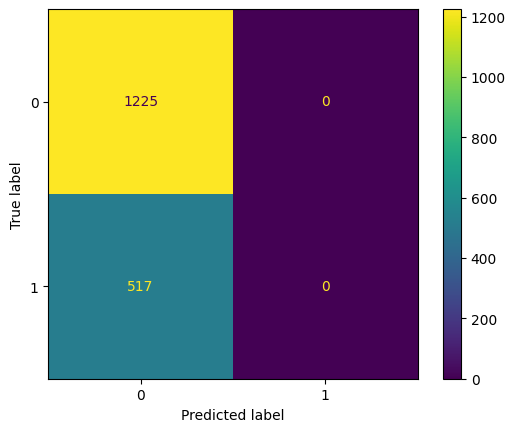

In [714]:
y_previsto = modelo_dummy.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
visualizacion = ConfusionMatrixDisplay(matriz_confusion)
visualizacion.plot()

In [715]:
print(f'La presicion del modelo_dummy es: {precision_score(y_val,y_previsto)}' )
print(f'La sensibilidad (Recall) del modelo_dummy es: {recall_score(y_val,y_previsto)}' )
print(f'La exactitud (Accuracy) del modelo_dummy es: {accuracy_score(y_val,y_previsto)}' )
print(f'F1 del modelo es: {f1_score(y_val,y_previsto)}' )

La presicion del modelo_dummy es: 0.0
La sensibilidad (Recall) del modelo_dummy es: 0.0
La exactitud (Accuracy) del modelo_dummy es: 0.7032146957520092
F1 del modelo es: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



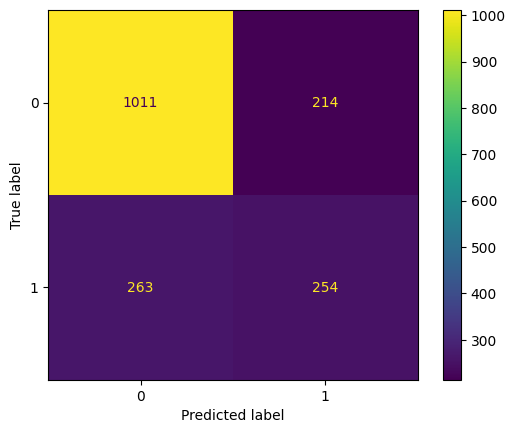

In [716]:
y_previsto = modelo_tree.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
visualizacion = ConfusionMatrixDisplay(matriz_confusion)
visualizacion.plot()

In [717]:
print(f'La presicion del modelo_tree es: {precision_score(y_val,y_previsto)}' )
print(f'La sensibilidad (Recall) del modelo_tree es: {recall_score(y_val,y_previsto)}' )
print(f'La exactitud (Accuracy) del modelo_tree es: {accuracy_score(y_val,y_previsto)}' )
print(f'F1 del modelo es: {f1_score(y_val,y_previsto)}' )

La presicion del modelo_tree es: 0.5427350427350427
La sensibilidad (Recall) del modelo_tree es: 0.4912959381044487
La exactitud (Accuracy) del modelo_tree es: 0.7261768082663606
F1 del modelo es: 0.515736040609137


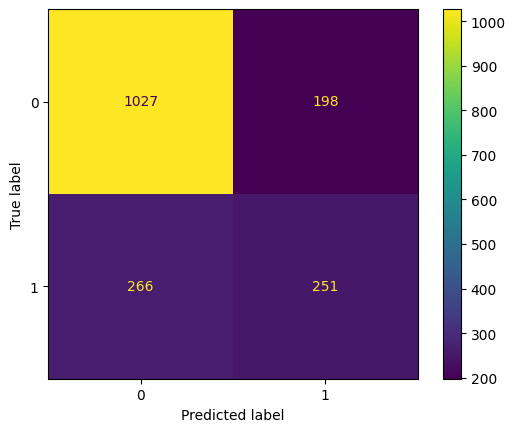

In [718]:
y_previsto = modelo_knn.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
visualizacion = ConfusionMatrixDisplay(matriz_confusion)
visualizacion.plot()

### Debido a que los modelos no presentan casi diferencias y hay demasiadas caracteristicas, se procede a purgar los datos que no representan correlacion aparente para con ello mejorar los resultados y evitar sesgos

In [719]:
print(f'La presicion del modelo_KNN es: {precision_score(y_val,y_previsto)}' )
print(f'La sensibilidad (Recall) del modelo_KNN es: {recall_score(y_val,y_previsto)}' )
print(f'La exactitud (Accuracy) del modelo_KNN es: {accuracy_score(y_val,y_previsto)}' )
print(f'F1 del modelo es: {f1_score(y_val,y_previsto)}' )

La presicion del modelo_KNN es: 0.5590200445434298
La sensibilidad (Recall) del modelo_KNN es: 0.48549323017408125
La exactitud (Accuracy) del modelo_KNN es: 0.7336394948335246
F1 del modelo es: 0.5196687370600414


In [720]:
X_codificado[['Male', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PhoneServiceMultipleLines', 'InternetServiceDSL',
       'InternetServiceFiberOptic', 'NoInternetService', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'onehotencoder__internet.StreamingMovies_Yes', 'ContractMonth',
       'ContractOneYear', 'ContractTwoYears', 'PaperlessBilling',
       'BankTransfer', 'CreditCard', 'Electronic_check', 'MailedCheck']].corrwith(y)

,0
Male,-0.005066
SeniorCitizen,0.144205
Partner,-0.138289
Dependents,-0.152112
PhoneService,0.008584
PhoneServiceMultipleLines,0.037606
InternetServiceDSL,-0.121967
InternetServiceFiberOptic,0.291985
NoInternetService,-0.211274
OnlineBackup,-0.078818


In [721]:
X_codificado=X_codificado.drop(['Male','PhoneService','PhoneServiceMultipleLines', 'OnlineBackup', 'DeviceProtection','StreamingTV','onehotencoder__internet.StreamingMovies_Yes','MailedCheck'], axis=1)

In [722]:
X_codificado.shape

(7256, 17)

In [723]:
X_codificado.corrwith(y)

,0
SeniorCitizen,0.144205
Partner,-0.138289
Dependents,-0.152112
InternetServiceDSL,-0.121967
InternetServiceFiberOptic,0.291985
NoInternetService,-0.211274
TechSupport,-0.158140
ContractMonth,0.385232
ContractOneYear,-0.168928
ContractTwoYears,-0.288160


## Nuevo entrenamiento

In [724]:
normalizacion = MinMaxScaler()
X_normalizado = normalizacion.fit_transform(X_codificado)

In [725]:
X, X_test_2, y_, y_test_2 = train_test_split(X_normalizado,y,test_size=0.2,random_state=500)
X_train, X_val, y_train, y_val = train_test_split(X,y_,test_size=0.3,random_state=500)

In [726]:
#Modelo de arbol
modelo_tree_2 = DecisionTreeClassifier(max_depth=10)
modelo_tree_2.fit(X_train,y_train)
modelo_tree_2.score(X_val,y_val)

0.7307692307692307

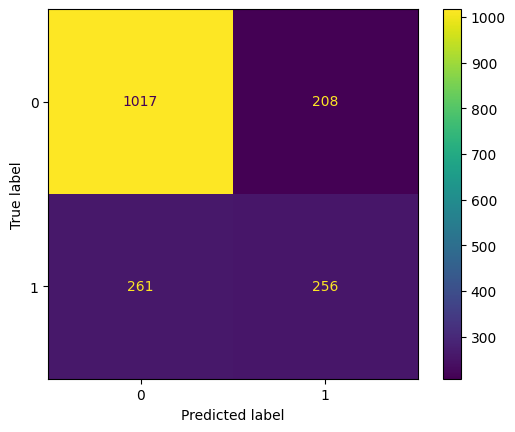

In [727]:
y_previsto = modelo_tree_2.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
visualizacion = ConfusionMatrixDisplay(matriz_confusion)
visualizacion.plot()

In [728]:
print(f'La presicion del modelo_tree es: {precision_score(y_val,y_previsto)}' )
print(f'La sensibilidad (Recall) del modelo_tree es: {recall_score(y_val,y_previsto)}' )
print(f'La exactitud (Accuracy) del modelo_tree es: {accuracy_score(y_val,y_previsto)}' )
print(f'F1 del modelo es: {f1_score(y_val,y_previsto)}' )

La presicion del modelo_tree es: 0.5517241379310345
La sensibilidad (Recall) del modelo_tree es: 0.4951644100580271
La exactitud (Accuracy) del modelo_tree es: 0.7307692307692307
F1 del modelo es: 0.5219164118246687


In [729]:
modelo_knn_2 = KNeighborsClassifier()
modelo_knn_2.fit(X_train,y_train)
modelo_knn_2.score(X_val,y_val)

0.7336394948335246

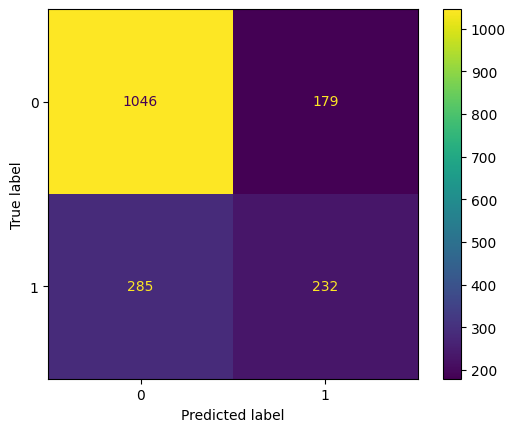

In [730]:
y_previsto = modelo_knn_2.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
visualizacion = ConfusionMatrixDisplay(matriz_confusion)
visualizacion.plot()

In [731]:
print(f'La presicion del modelo_KNN es: {precision_score(y_val,y_previsto)}' )
print(f'La sensibilidad (Recall) del modelo_KNN es: {recall_score(y_val,y_previsto)}' )
print(f'La exactitud (Accuracy) del modelo_KNN es: {accuracy_score(y_val,y_previsto)}' )
print(f'F1 del modelo es: {f1_score(y_val,y_previsto)}' )

La presicion del modelo_KNN es: 0.5644768856447688
La sensibilidad (Recall) del modelo_KNN es: 0.44874274661508706
La exactitud (Accuracy) del modelo_KNN es: 0.7336394948335246
F1 del modelo es: 0.5


### Tercer filtro: Mayor disminucion de variables

In [732]:
X_codificado.corrwith(y)

,0
SeniorCitizen,0.144205
Partner,-0.138289
Dependents,-0.152112
InternetServiceDSL,-0.121967
InternetServiceFiberOptic,0.291985
NoInternetService,-0.211274
TechSupport,-0.158140
ContractMonth,0.385232
ContractOneYear,-0.168928
ContractTwoYears,-0.288160


In [733]:
X_codificado=X_codificado.drop(['SeniorCitizen','Partner','Dependents','InternetServiceDSL','TechSupport','ContractOneYear','PaperlessBilling','BankTransfer','CreditCard','ChargesMonthly','Total'], axis=1)

In [734]:
X_codificado.corrwith(y)

,0
InternetServiceFiberOptic,0.291985
NoInternetService,-0.211274
ContractMonth,0.385232
ContractTwoYears,-0.288160
Electronic_check,0.286869
ternure,-0.336071


In [735]:
normalizacion = MinMaxScaler()
X_normalizado = normalizacion.fit_transform(X_codificado)

In [736]:
X, X_test_3, y_, y_test_3 = train_test_split(X_normalizado,y,test_size=0.2,random_state=500)
X_train, X_val, y_train, y_val = train_test_split(X,y_,test_size=0.3,random_state=500)

In [737]:
#Modelo de arbol
modelo_tree_3 = DecisionTreeClassifier(max_depth=10)
modelo_tree_3.fit(X_train,y_train)
modelo_tree_3.score(X_val,y_val)

0.743398392652124

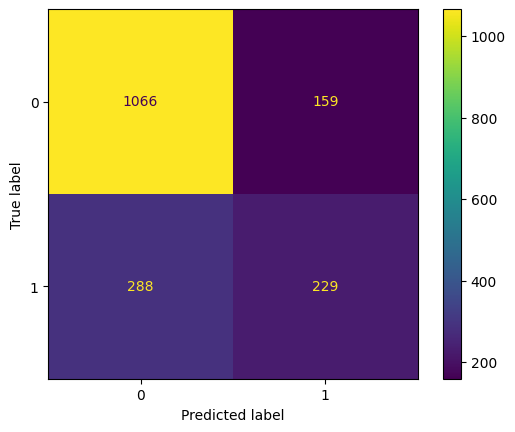

In [738]:
y_previsto = modelo_tree_3.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
visualizacion = ConfusionMatrixDisplay(matriz_confusion)
visualizacion.plot()

In [739]:
print(f'La presicion del modelo_tree es: {precision_score(y_val,y_previsto)}' )
print(f'La sensibilidad (Recall) del modelo_tree es: {recall_score(y_val,y_previsto)}' )
print(f'La exactitud (Accuracy) del modelo_tree es: {accuracy_score(y_val,y_previsto)}' )
print(f'F1 del modelo es: {f1_score(y_val,y_previsto)}' )

La presicion del modelo_tree es: 0.5902061855670103
La sensibilidad (Recall) del modelo_tree es: 0.44294003868471954
La exactitud (Accuracy) del modelo_tree es: 0.743398392652124
F1 del modelo es: 0.5060773480662983


In [740]:
#Modelo KNN
modelo_knn_3 = KNeighborsClassifier()
modelo_knn_3.fit(X_train,y_train)
modelo_knn_3.score(X_val,y_val)

0.7278989667049368

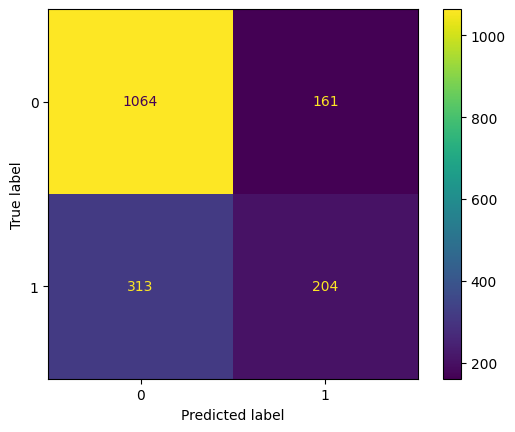

In [741]:
y_previsto = modelo_knn_3.predict(X_val)
matriz_confusion = confusion_matrix(y_val,y_previsto)
visualizacion = ConfusionMatrixDisplay(matriz_confusion)
visualizacion.plot()

In [742]:
print(f'La presicion del modelo_KNN es: {precision_score(y_val,y_previsto)}' )
print(f'La sensibilidad (Recall) del modelo_KNN es: {recall_score(y_val,y_previsto)}' )
print(f'La exactitud (Accuracy) del modelo_KNN es: {accuracy_score(y_val,y_previsto)}' )
print(f'F1 del modelo es: {f1_score(y_val,y_previsto)}' )

La presicion del modelo_KNN es: 0.5589041095890411
La sensibilidad (Recall) del modelo_KNN es: 0.3945841392649903
La exactitud (Accuracy) del modelo_KNN es: 0.7278989667049368
F1 del modelo es: 0.46258503401360546


## **Comparando modelos**

In [743]:
from sklearn.metrics import classification_report

### Modelos de arbol

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       993
           1       0.58      0.48      0.53       459

    accuracy                           0.73      1452
   macro avg       0.68      0.66      0.67      1452
weighted avg       0.72      0.73      0.72      1452



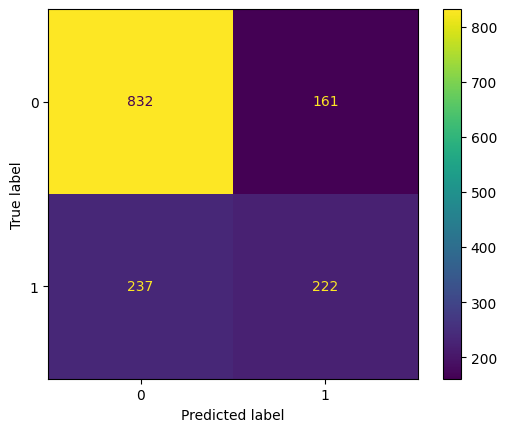

In [744]:
y_previsto= modelo_tree.predict(X_test_1)
print(classification_report(y_test_1,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test_1,y_previsto)

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       993
           1       0.57      0.48      0.52       459

    accuracy                           0.72      1452
   macro avg       0.68      0.66      0.66      1452
weighted avg       0.71      0.72      0.72      1452



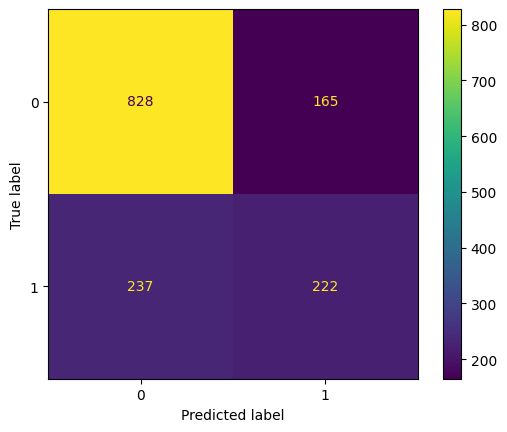

In [745]:
y_previsto= modelo_tree_2.predict(X_test_2)
print(classification_report(y_test_2,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test_2,y_previsto)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       993
           1       0.67      0.48      0.56       459

    accuracy                           0.76      1452
   macro avg       0.73      0.69      0.70      1452
weighted avg       0.75      0.76      0.75      1452



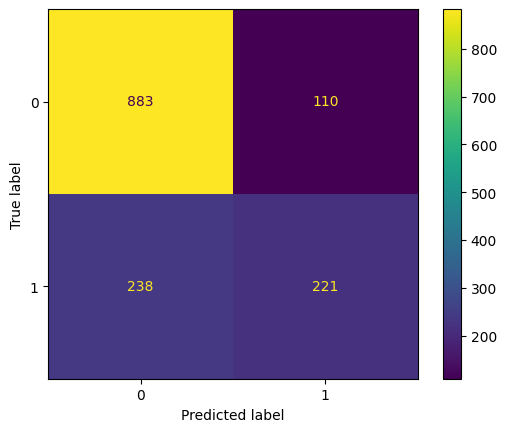

In [746]:
y_previsto= modelo_tree_3.predict(X_test_3)
print(classification_report(y_test_3,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test_3,y_previsto)

### Modelos KNN

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       993
           1       0.60      0.47      0.53       459

    accuracy                           0.73      1452
   macro avg       0.69      0.66      0.67      1452
weighted avg       0.72      0.73      0.72      1452



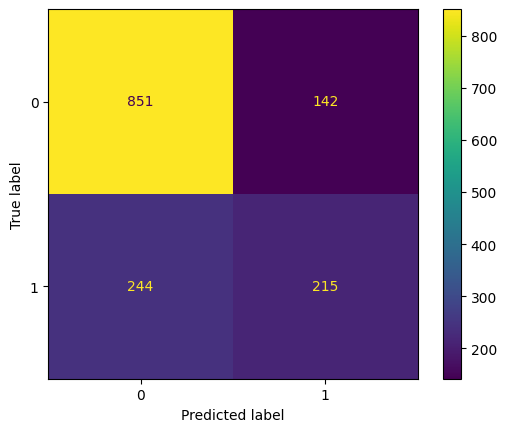

In [747]:
y_previsto= modelo_knn.predict(X_test_1)
print(classification_report(y_test_1,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test_1,y_previsto)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       993
           1       0.62      0.45      0.52       459

    accuracy                           0.74      1452
   macro avg       0.70      0.66      0.67      1452
weighted avg       0.73      0.74      0.73      1452



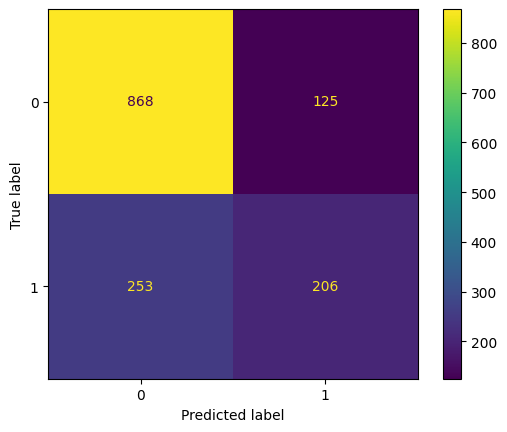

In [748]:
y_previsto= modelo_knn_2.predict(X_test_2)
print(classification_report(y_test_2,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test_2,y_previsto)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       993
           1       0.60      0.47      0.53       459

    accuracy                           0.73      1452
   macro avg       0.69      0.66      0.67      1452
weighted avg       0.72      0.73      0.72      1452



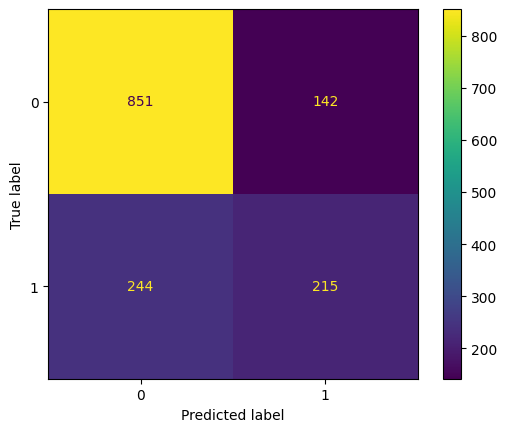

In [749]:
y_previsto= modelo_knn.predict(X_test_1)
print(classification_report(y_test_2,y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test_2,y_previsto)

# **Interpretacion y conclusiones**

## Modelo ganador

El modelo ganador fue el modelo_tree_3, debido a quien fue el que mejor exactitud, presicion y recall tuvo, con un 76%, 79%, 84% respectivamente, ademas de que al requerir menos datos, esta es mas rapida y eficente, pues requiere de una menor carga.

In [750]:
import pickle

In [751]:
with open('modelo_champion.pkl','wb') as archivo:
  pickle.dump(modelo_tree_3,archivo)

## **Informe**

En el presente documento, se puede observar como se fueron entrenando los distintos modelos hasta llegar al ganador.

Se puede observar como se empezo con una gigantesca cantidad de variables a evaluar y como estas con el paso fueron disminuyendo, eliminando las variables irrelevantes que solo provocaban sesgos, hasta quedarnos solo con las 6 de mayor impacto, las cuales hicieron que se obtuviera un mejor resultado con los modelos. Estas variables fueron las siguientes:

### Variables que propician la cancelacion

Una vez filtradas las variables que si tenian una fuerte correlacion con la cancelacion de los clientes, se obtuvieron las 3 principales causantes del mismo:

- Internet por fibra optica
- Contrato mes por mes
- Electronic check

### Variables que favorecen la lealtadd del cliente

Igual que en el punto anterior, una vez filtradas las variables, se obtuvieron 3 variables las cuales representan casi en su totalidad, las condiciones o motivos por los cuales los clientes mantienen su suscripcion:

- No tener servicio a internet
- Contrato de 2 años
- Meses contratados

### Conclusion

Una vez analisado estas variables, se puede concluir que la empresa tiene un serio problema con su servicio de internet, en especial la fibra optiva, ademas de evidenciar que le cuesta mantener nuevos clientes, ya que la gran mayoria que mantiene su suscripcion son porque firmaron por 2 años o porque ya llevan mucho tiempo en la empresa.

Se deberia de optar por mejorar enormemente el servico de internet, ademas de alentar a los nuevos clientes a mantenerse, enviadoles ofertas o algun aditivo que los hiciera contratarlo por mas de un mes y asi ganar un cliente constante.